In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Loading datasets
df1 = pd.read_csv('pqrst_intervals.csv')
df2 = pd.read_csv(r'C:\ECG Project\ecgdeli_features.csv') 

In [24]:
#Step 2: Rename Features
df1 = df1.rename(columns={'PR Interval (ms)': 'PR_Int_V6', 
                           'P Amplitude': 'P_Amp_V6', 
                           'Q Amplitude': 'Q_Amp_V6', 
                           'QRS Duration (ms)': 'QRS_Dur_V6', 
                           'R Amplitude': 'R_Amp_V6', 
                           'S Amplitude': 'S_Amp_V6', 
                           'T Amplitude': 'T_Amp_V6'})


In [26]:
# Step 3: Select relevant columns from both datasets
df1_selected = df1[['ecg_id', 'PR_Int_V6', 'P_Amp_V6', 'Q_Amp_V6', 'QRS_Dur_V6', 'R_Amp_V6', 'S_Amp_V6', 'T_Amp_V6']]
df2_selected = df2[['ecg_id', 'PR_Int_V6', 'P_Amp_V6', 'Q_Amp_V6', 'QRS_Dur_V6', 'R_Amp_V6', 'S_Amp_V6', 'T_Amp_V6']]


In [28]:
# Step 4: Merge the two datasets on 'ecg_id'
merged_df = df1_selected.merge(df2_selected, on='ecg_id', suffixes=('_df1', '_df2'))
merged_df.to_csv('merged_ecg_features.csv', index=False)

In [30]:
# Step 5: Calculate the correlation matrix
correlation_matrix = merged_df.corr()
correlation_matrix.to_csv('CM.csv', index=False)

# Print the correlation matrix
print(correlation_matrix)


                  ecg_id  PR_Int_V6_df1  P_Amp_V6_df1  Q_Amp_V6_df1  \
ecg_id          1.000000       0.034462      0.053041      0.025321   
PR_Int_V6_df1   0.034462       1.000000     -0.074280     -0.023067   
P_Amp_V6_df1    0.053041      -0.074280      1.000000      0.453146   
Q_Amp_V6_df1    0.025321      -0.023067      0.453146      1.000000   
QRS_Dur_V6_df1  0.074488       0.216003     -0.023942      0.124360   
R_Amp_V6_df1   -0.049472       0.094586     -0.305939     -0.430781   
S_Amp_V6_df1    0.046998      -0.023892     -0.070311     -0.093620   
T_Amp_V6_df1   -0.095670      -0.010775     -0.416765     -0.409437   
PR_Int_V6_df2   0.053763       0.501467      0.019647      0.144355   
P_Amp_V6_df2    0.042940      -0.045082      0.499628      0.240718   
Q_Amp_V6_df2    0.024138       0.087096      0.206169      0.546407   
QRS_Dur_V6_df2  0.091848       0.147044      0.000019      0.054019   
R_Amp_V6_df2   -0.052855       0.062130     -0.305790     -0.421609   
S_Amp_

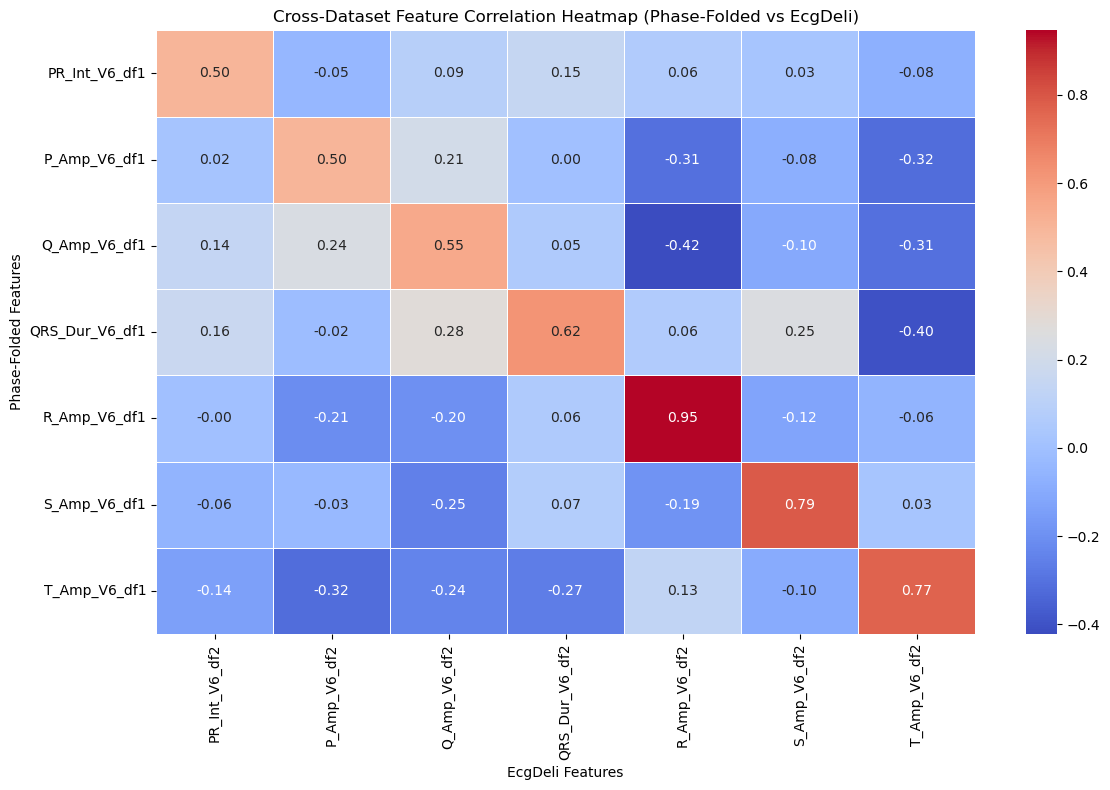

In [38]:
# Step 1: Merge the two datasets on 'ecg_id' using an outer join to include all ecg_ids
merged_df = df1_selected.merge(df2_selected, on='ecg_id', how='outer', suffixes=('_df1', '_df2'))

# Step 2: Select the relevant columns from both datasets (including 'ecg_id')
df1_cols = [col for col in merged_df.columns if col.endswith('_df1')]
df2_cols = [col for col in merged_df.columns if col.endswith('_df2')]

# Step 3: Compute the cross-correlation matrix 
cross_corr_matrix = merged_df[df1_cols].corrwith(merged_df[df2_cols], axis=0)
cross_corr_matrix = pd.DataFrame(index=df1_cols, columns=df2_cols)


for col1 in df1_cols:
    for col2 in df2_cols:
        cross_corr_matrix.loc[col1, col2] = merged_df[col1].corr(merged_df[col2])

# Step 4: Convert values to float for heatmap plotting
cross_corr_matrix = cross_corr_matrix.astype(float)

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Cross-Dataset Feature Correlation Heatmap (Phase-Folded vs EcgDeli)')
plt.xlabel('EcgDeli Features')
plt.ylabel('Phase-Folded Features')
plt.tight_layout()
plt.savefig("EcgDeliCorr.png", dpi=300, bbox_inches='tight')
plt.show()


In [34]:
# Extract just the pairs of columns
columns = ['PR_Int_V6', 'P_Amp_V6', 'Q_Amp_V6', 'QRS_Dur_V6', 'R_Amp_V6', 'S_Amp_V6', 'T_Amp_V6']

correlation_results = {}
for col in columns:
    corr = merged_df[f"{col}_df1"].corr(merged_df[f"{col}_df2"])
    correlation_results[col] = corr

# Display as DataFrame
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Pearson Correlation'])
print(correlation_df)


            Pearson Correlation
PR_Int_V6              0.501467
P_Amp_V6               0.499628
Q_Amp_V6               0.546407
QRS_Dur_V6             0.623292
R_Amp_V6               0.946051
S_Amp_V6               0.790561
T_Amp_V6               0.766097


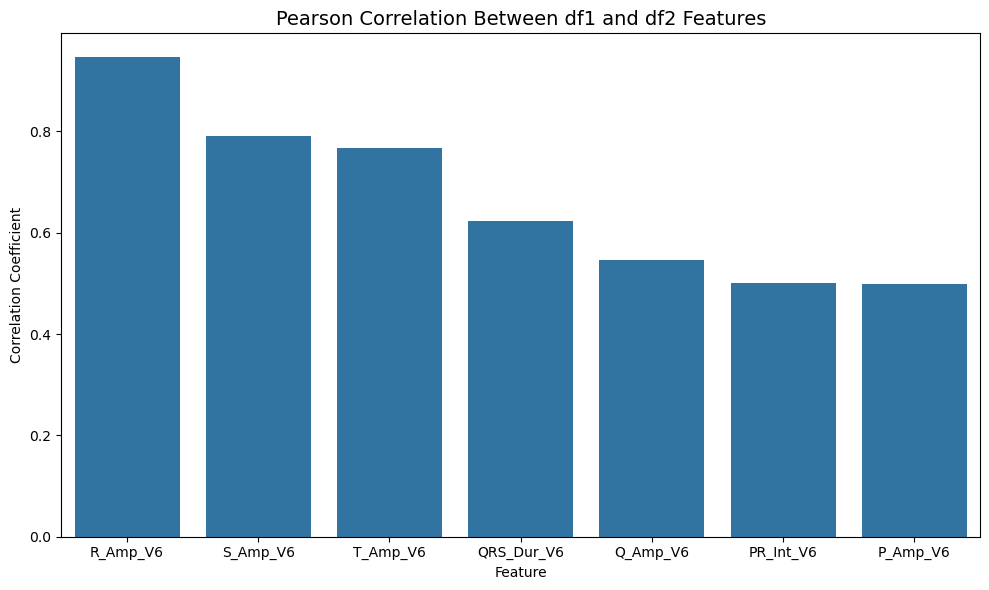

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_df_sorted = correlation_df.sort_values(by='Pearson Correlation', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y='Pearson Correlation', data=correlation_df_sorted)
plt.title('Pearson Correlation Between df1 and df2 Features', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


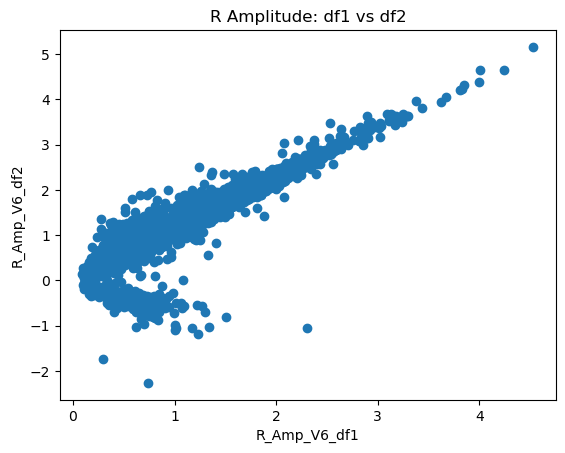

In [40]:
#Correlation between R amplitudes
plt.scatter(merged_df['R_Amp_V6_df1'], merged_df['R_Amp_V6_df2'])
plt.title('R Amplitude: df1 vs df2')
plt.xlabel('R_Amp_V6_df1')
plt.ylabel('R_Amp_V6_df2')
plt.show()